# 4. 상점 신용카드 매출 예측

## 4.1. 문제 정의

### 4.1.4 문제 해결을 위한 접근 방식 소개

In [2]:
import pandas as pd
import os
import warnings

warnings.filterwarnings("ignore")

os.chdir('./data/chap04')
train = pd.read_csv('./funda_train.csv')
submission = pd.read_csv('./submission.csv')

In [3]:
train.shape

(6556613, 9)

In [4]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [6]:
train[:5]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [7]:
train[train['amount']<0]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
41,0,40,a,2016-06-10,17:26,2,NaN,기타 미용업,-8571.428571
347,0,285,a,2016-08-04,17:52,0,NaN,기타 미용업,-1857.142857
731,0,473,g,2016-10-17,10:32,0,NaN,기타 미용업,-2000.000000
831,0,230,b,2016-11-03,15:36,0,NaN,기타 미용업,-85.714286
944,0,138,a,2016-11-28,13:21,0,NaN,기타 미용업,-57.142857
...,...,...,...,...,...,...,...,...,...
6556242,2136,4663626,b,2019-02-01,21:19,0,제주 제주시,기타 주점업,-13428.571429
6556448,2136,4663760,d,2019-02-15,00:46,0,제주 제주시,기타 주점업,-6928.571429
6556485,2136,4663779,b,2019-02-18,02:45,0,제주 제주시,기타 주점업,-5571.428571
6556489,2136,4663780,d,2019-02-18,21:43,0,제주 제주시,기타 주점업,-8571.428571


## 4.2 데이터 전처리

### 4.2.1 노이즈 제거

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

train = pd.read_csv('./funda_train.csv')
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

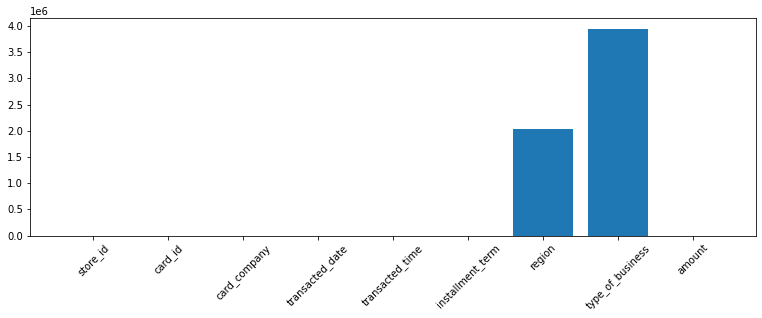

In [10]:
plt.figure(figsize=(13, 4))
plt.bar(train.columns, train.isnull().sum())
plt.xticks(rotation=45)

In [11]:
train = train.drop(['region','type_of_business'],axis=1)
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
0,0,0,b,2016-06-01,13:13,0,1857.142857
1,0,1,h,2016-06-01,18:12,0,857.142857
2,0,2,c,2016-06-01,18:52,0,2000.000000
3,0,3,a,2016-06-01,20:22,0,7857.142857
4,0,4,c,2016-06-02,11:06,0,2000.000000


<AxesSubplot:xlabel='amount'>

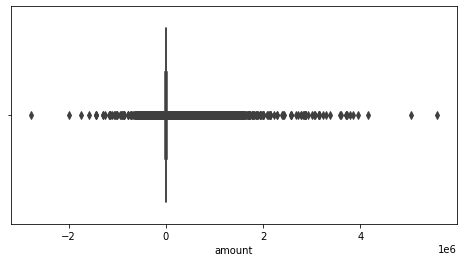

In [12]:
plt.figure(figsize=(8, 4))
sns.boxplot(train['amount'])

In [ ]:
train[train['amount']<0].head()

In [13]:
# 거래일와 거래시간을 합친 변수를 생성합니다.
train['datetime'] = pd.to_datetime(train.transacted_date + " " + 
                                train.transacted_time, format='%Y-%m-%d %H:%M:%S')
## 환불 거래를 제거하는 함수를 정의합니다.
def remove_refund(df):
    refund = df[df['amount']<0] # 매출액 음숫값 데이터를 추출합니다.
    non_refund = df[df['amount']>0] # 매출액 양숫값 데이터를 추출합니다.
    removed_data = pd.DataFrame()
    
    for i in tqdm(df.store_id.unique()):
        # 매출액이 양숫값인 데이터를 상점별로 나눕니다.
        divided_data = non_refund[non_refund['store_id']==i] 
        # 매출액이 음숫값인 데이터를 상점별로 나눕니다.
        divided_data2 = refund[refund['store_id']==i] 
        
        for neg in divided_data2.to_records()[:]: # 환불 데이터를 차례대로 검사합니다.
            refund_store = neg['store_id']
            refund_id = neg['card_id'] # 환불 카드 아이디를 추출합니다.
            refund_datetime = neg['datetime'] # 환불 시간을 추출합니다.
            refund_amount = abs(neg['amount']) # 매출 음숫값의 절댓값을 구합니다.
                
            ## 환불 시간 이전의 데이터 중 카드 이이디와 환불액이 같은 후보 리스트를 뽑습니다.
            refund_pay_list = divided_data[divided_data['datetime']<=refund_datetime]
            refund_pay_list = refund_pay_list[refund_pay_list['card_id']==refund_id]
            refund_pay_list = refund_pay_list[refund_pay_list['amount']==refund_amount]
                     
            # 후보 리스트가 있으면 카드 아이디, 환불액이 같으면서 가장 최근시간을 제거합니다.
            if(len(refund_pay_list)!=0):
                refund_datetime = max(refund_pay_list['datetime']) # 가장 최근 시간을 구합니다
                noise_list = divided_data[divided_data['datetime']==refund_datetime] # 가장 최근시간
                noise_list = noise_list[noise_list['card_id']==refund_id] # 환불 카드 아이디
                noise_list = noise_list[noise_list['amount']==refund_amount] ## 환불액
                divided_data = divided_data.drop(index=noise_list.index) # 인덱스를 통해 제거
                    
        ## 제거한 데이터를 데이터프레임에 추가합니다.
        removed_data = pd.concat([removed_data,divided_data],axis=0)
    
    return removed_data

100%|██████████| 1967/1967 [06:39<00:00,  4.92it/s]


<AxesSubplot:xlabel='amount'>

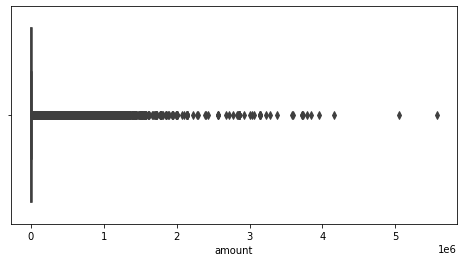

In [14]:
## 환불 거래 제거 함수를 통해 환불 거래를 제거합니다.
positive_data = remove_refund(train)
plt.figure(figsize=(8, 4))
sns.boxplot(positive_data['amount'])

### 4.2.2 다운 샘플링

In [15]:
# 5개의 행을 출력합니다.
positive_data.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount,datetime
0,0,0,b,2016-06-01,13:13,0,1857.142857,2016-06-01 13:13:00
1,0,1,h,2016-06-01,18:12,0,857.142857,2016-06-01 18:12:00
2,0,2,c,2016-06-01,18:52,0,2000.000000,2016-06-01 18:52:00
3,0,3,a,2016-06-01,20:22,0,7857.142857,2016-06-01 20:22:00
4,0,4,c,2016-06-02,11:06,0,2000.000000,2016-06-02 11:06:00


In [16]:
## 월 단위 다운 샘플링 함수를 정의
def month_resampling(df):
    new_data = pd.DataFrame() 
    # 년도와 월을 합친 변수를 생성합니다.
    df['year_month'] = df['transacted_date'].str.slice(stop=7)
    # 데이터의 전체 기간을 추출합니다.
    year_month = df['year_month'].drop_duplicates()
    # 상점 아이디별로 월 단위 매출액 총합을 구합니다.
    downsampling_data = df.groupby(['store_id', 'year_month']).amount.sum()
    downsampling_data = pd.DataFrame(downsampling_data)
    downsampling_data = downsampling_data.reset_index(drop=False,inplace=False)
    
    for i in tqdm(df.store_id.unique()):
        # 상점별로 데이터를 처리합니다.
        store = downsampling_data[downsampling_data['store_id']==i]
        # 각 상점의 처음 매출이 발생한 월을 구합니다.
        start_time = min(store['year_month'])
        # 모든 상점을 전체 기간 데이터로 만듭니다.
        store = store.merge(year_month,how='outer')
        # 데이터를 시간순으로 정렬합니다.
        store = store.sort_values(by=['year_month'], axis=0, ascending=True) 
        store['amount'] = store['amount'].fillna(2)   # 매출이 발생하지 않는 월은 2로 채웁니다.
        store['store_id'] = store['store_id'].fillna(i)  # 상점 아이디 결측치를 채웁니다.
        store = store[store['year_month']>=start_time]  # 처음 매출이 발생한 월 이후만 뽑습니다.
        
        new_data = pd.concat([new_data,store],axis=0)
        
    return new_data

In [17]:
# 환불 제거 데이터를 월 단위로 다운 샘플링합니다.
resampling_data = month_resampling(positive_data)
resampling_data['store_id'] = resampling_data['store_id'].astype(int)
resampling_data

100%|██████████| 1967/1967 [00:08<00:00, 243.11it/s]


,store_id,year_month,amount
0,0,2016-06,7.470000e+05
1,0,2016-07,1.005000e+06
2,0,2016-08,8.697143e+05
3,0,2016-09,8.978571e+05
4,0,2016-10,8.354286e+05
...,...,...,...
17,2136,2018-10,2.012214e+06
18,2136,2018-11,2.127643e+06
19,2136,2018-12,2.427429e+06
20,2136,2019-01,1.867786e+06


### 4.2.3 날짜 지정 범위 생성과 시리즈 객체 변환

In [18]:
## 데이터 타입을 출력
print(type(resampling_data))

<class 'pandas.core.frame.DataFrame'>


In [19]:
# 데이터프레임을 Series로 변환하는 함수
def time_series(df, i):
    # 상점별로 데이터를 뽑습니다.
    store = df[df['store_id']==i]
    ## 날짜 지정 범위는 영업 시작 월부터 2019년 3월 전까지 영업 마감일 기준
    index = pd.date_range(min(store['year_month']),'2019-03',freq='BM') 
    ## 시리즈 객체로 변환
    ts = pd.Series(store['amount'].values,index=index)
    return ts

In [20]:
# 상점 아이디가 0번인 데이터를 시리즈 객체로 변환
store_0 = time_series(resampling_data, 0)
store_0

2016-06-30    7.470000e+05
2016-07-29    1.005000e+06
2016-08-31    8.697143e+05
2016-09-30    8.978571e+05
2016-10-31    8.354286e+05
2016-11-30    6.970000e+05
2016-12-30    7.618571e+05
2017-01-31    5.856429e+05
2017-02-28    7.940000e+05
2017-03-31    7.202571e+05
2017-04-28    6.852857e+05
2017-05-31    7.444286e+05
2017-06-30    6.820000e+05
2017-07-31    7.282857e+05
2017-08-31    7.490000e+05
2017-09-29    8.408571e+05
2017-10-31    6.005714e+05
2017-11-30    6.308571e+05
2017-12-29    8.127143e+05
2018-01-31    6.431429e+05
2018-02-28    6.852857e+05
2018-03-30    8.484286e+05
2018-04-30    6.361429e+05
2018-05-31    6.864286e+05
2018-06-29    7.072857e+05
2018-07-31    7.587143e+05
2018-08-31    6.798571e+05
2018-09-28    6.518571e+05
2018-10-31    7.390000e+05
2018-11-30    6.760000e+05
2018-12-31    8.745714e+05
2019-01-31    6.828571e+05
2019-02-28    5.152857e+05
Freq: BM, dtype: float64

In [21]:
## 데이터 타입을 출력
store_1 = time_series(resampling_data, 1)
print(type(store_1))

<class 'pandas.core.series.Series'>


<AxesSubplot:>

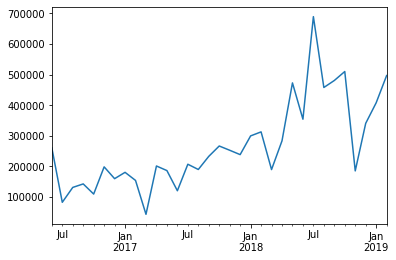

In [22]:
# 상점 아이디가 2번인 데이터를 시리즈 객체로 변환
store_2 = time_series(resampling_data, 2)
store_2.plot()